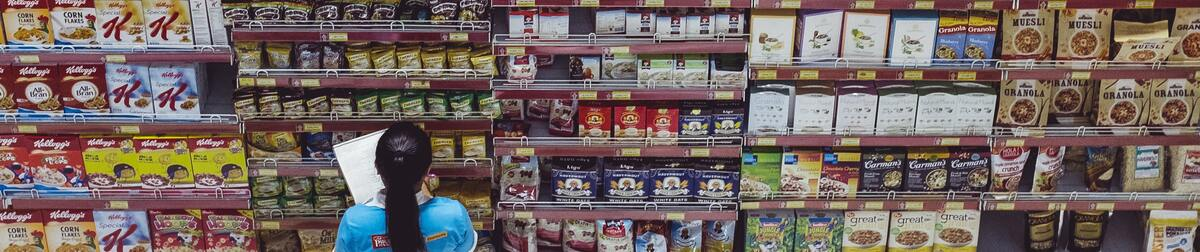

<h2>About Dataset</h2><br>


---


Welcome to the Retail Sales and Customer Demographics Dataset! This synthetic dataset has been meticulously crafted to simulate a dynamic retail environment, providing an ideal playground for those eager to sharpen their data analysis skills through exploratory data analysis (EDA). With a focus on retail sales and customer characteristics, this dataset invites you to unravel intricate patterns, draw insights, and gain a deeper understanding of customer behavior.

###Dataset Overview:


---


This dataset is a snapshot of a fictional retail landscape, capturing essential attributes that drive retail operations and customer interactions. It includes key details such as Transaction ID, Date, Customer ID, Gender, Age, Product Category, Quantity, Price per Unit, and Total Amount. These attributes enable a multifaceted exploration of sales trends, demographic influences, and purchasing behaviors.

**Let us start with importing the python lybraries.**


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

**Importing the dataset as df.**

In [ ]:
df=pd.read_csv('retail_sales_dataset.csv')

In [ ]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


**Here we have the following columns in the dataset**


---


1. Transaction ID: A unique identifier for each transaction, allowing tracking and reference.

2. Date: The date when the transaction occurred, providing insights into sales trends over time.

3. Customer ID: A unique identifier for each customer, enabling customer-centric analysis.

4. Gender: The gender of the customer (Male/Female), offering insights into gender-based purchasing patterns.

5. Age: The age of the customer, facilitating segmentation and exploration of age-related influences.

6. Product Category: The category of the purchased product (e.g., Electronics, Clothing, Beauty), helping understand product preferences.

7. Quantity: The number of units of the product purchased, contributing to insights on purchase volumes.

8. Price per Unit: The price of one unit of the product, aiding in calculations related to total spending.

9. Total Amount: The total monetary value of the transaction, showcasing the financial impact of each purchase.

In [ ]:
df.nunique()

Transaction ID      1000
Date                 345
Customer ID         1000
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
dtype: int64

In [ ]:
# Let's check for the unll values. and if we'll find any null values we will take actions according to it
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [ ]:
# Calculating basic statistics

df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


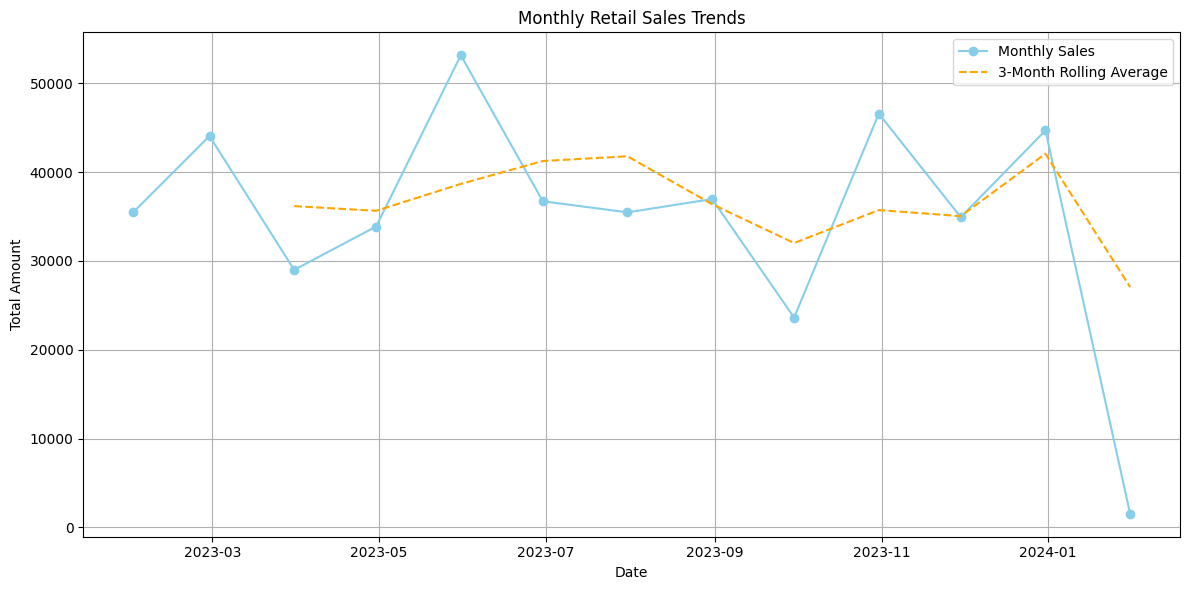

In [ ]:
import matplotlib.pyplot as plt


# Ensure that the index is in datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Resample data to monthly frequency
monthly_sales = df['Total Amount'].resample('M').sum()  # Summing total sales amount for each month

# Plot monthly sales trends over time
plt.figure(figsize=(12, 6))

# Line plot
line, = plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='skyblue', label='Monthly Sales')

# Rolling average (smoothed trend)
rolling_avg = monthly_sales.rolling(window=3).mean()  # 3-month rolling average
plt.plot(rolling_avg.index, rolling_avg.values, linestyle='--', color='orange', label='3-Month Rolling Average')

# Add labels and title
plt.title('Monthly Retail Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Amount')

# Add legend
plt.legend()

# Add gridlines
plt.grid(True)


# Show plot
plt.tight_layout()
plt.show()


#Monthly Retail Sales trends.


---


### We can see the graph above this which is consist of **Total Amount** and Dates in each 3 months which is: <br> **1. Janaury to March:**

---



*   The sales started at approximately **40,000** and decreased to around **30,000**.
*  This decline could be due to seasonal factors or specific events during this period.


### **2. March to May:**


---


*   The sales increased from around 30,000 to approximately **50,000**.
*   This growth might be influenced by factors such as promotions, new product launches, or increased consumer demand.

### **3. May to July:**

---
*   The sales decreased sharply from approximately **50,000** to around **20,000**.
*   A significant drop like this could be related to economic conditions, supply chain disruptions, or other external factors.


### **4. July to September:**

---
*   The sales increased again from around **20,000** to approximately **45,000**.
*   Seasonal trends or successful marketing campaigns might have contributed to this rebound.


### **5. Septempber to November:**

---
*  A decline is observed as the sales dropped from approximately **45,000** down towards the range of about **25,000**.
*   Possible reasons could include changing consumer preferences or market saturation.


### **6. November to Janaury:**
---

*   There is a drastic drop in the sales going down almost reaching **zero**.
*   The reason Could be We dont have data after dec month




In [ ]:
# Customer Demographics Analysis
gender_distribution = df['Gender'].value_counts()
age_distribution = df['Age'].value_counts()

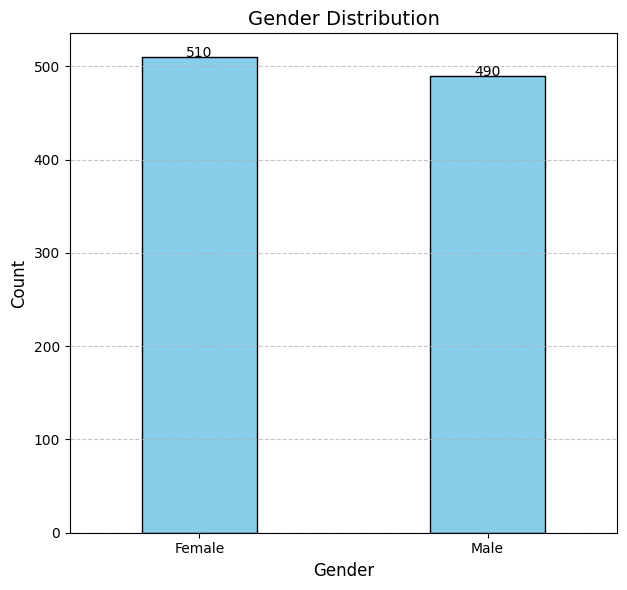

In [ ]:
plt.figure(figsize=(12, 6))  # Increase figure size

# Plot gender distribution
ax1 = plt.subplot(1, 2, 1)
gender_distribution.plot(kind='bar', color='skyblue', width=0.4, edgecolor='black', ax=ax1)  # Adjust bar width and edge color
plt.title('Gender Distribution', fontsize=14)  # Customize title
plt.xlabel('Gender', fontsize=12)  # Customize x-axis label
plt.ylabel('Count', fontsize=12)  # Customize y-axis label
plt.xticks(rotation=0, fontsize=10)  # Rotate x-axis tick labels for better readability and customize font size
plt.yticks(fontsize=10)  # Customize y-axis tick labels font size
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal gridlines

# Add data labels
for i, count in enumerate(gender_distribution):
    plt.text(i, count + 0.1, str(count), ha='center', fontsize=10)  # Add data labels above each bar

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


## **Gender Distribution:**


---


*  **Female:** There are 510 females represented.
*  **Male:** There are 490 males represented.


---


The data indicates a nearly equal distribution between the two genders. The total count of individuals is 1000. 📊

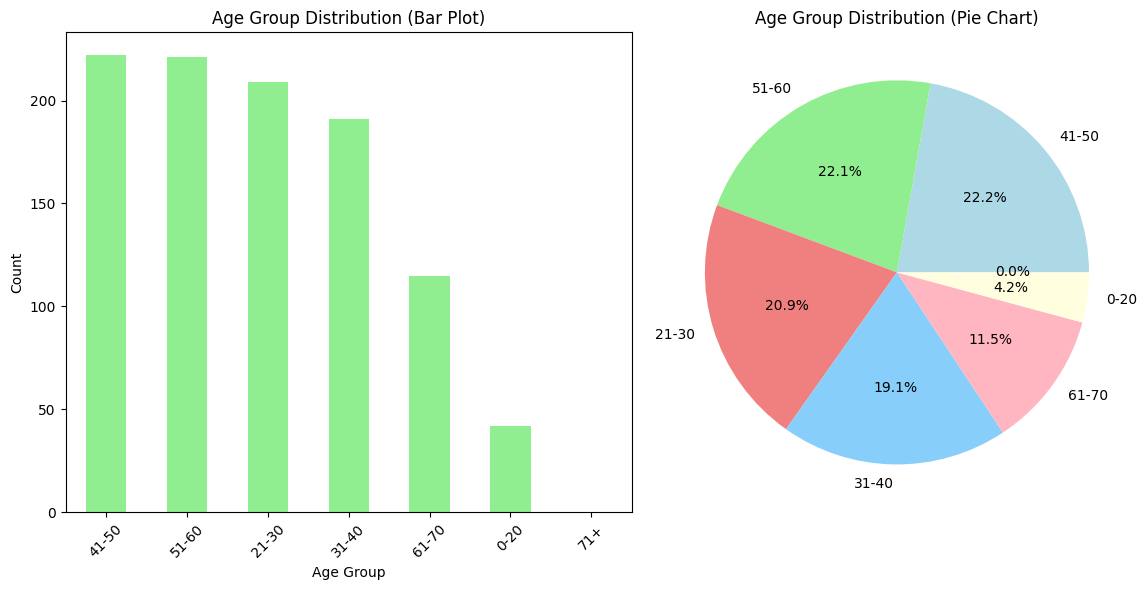

In [ ]:
import matplotlib.pyplot as plt

# Plot age group distribution using a bar plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
age_group_distribution.plot(kind='bar', color='lightgreen')
plt.title('Age Group Distribution (Bar Plot)')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Plot age group distribution using a pie chart
plt.subplot(1, 2, 2)
age_group_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink', 'lightyellow', 'lightgrey'])
plt.title('Age Group Distribution (Pie Chart)')
plt.ylabel('')
plt.tight_layout()

plt.show()


### **Age group distribution.**

---


*  The most represented age groups are **51-60** and **41-50**, both having over **200 counts.**
*  The least represented age groups are **0-20** and **71+**, with significantly lower counts.

In [ ]:
# Purchasing Behavior Analysis
product_category_distribution = df['Product Category'].value_counts()
quantity_distribution = df['Quantity'].describe()
total_amount_distribution = df['Total Amount'].describe()

In [ ]:
# Visualization of Purchasing Behavior
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

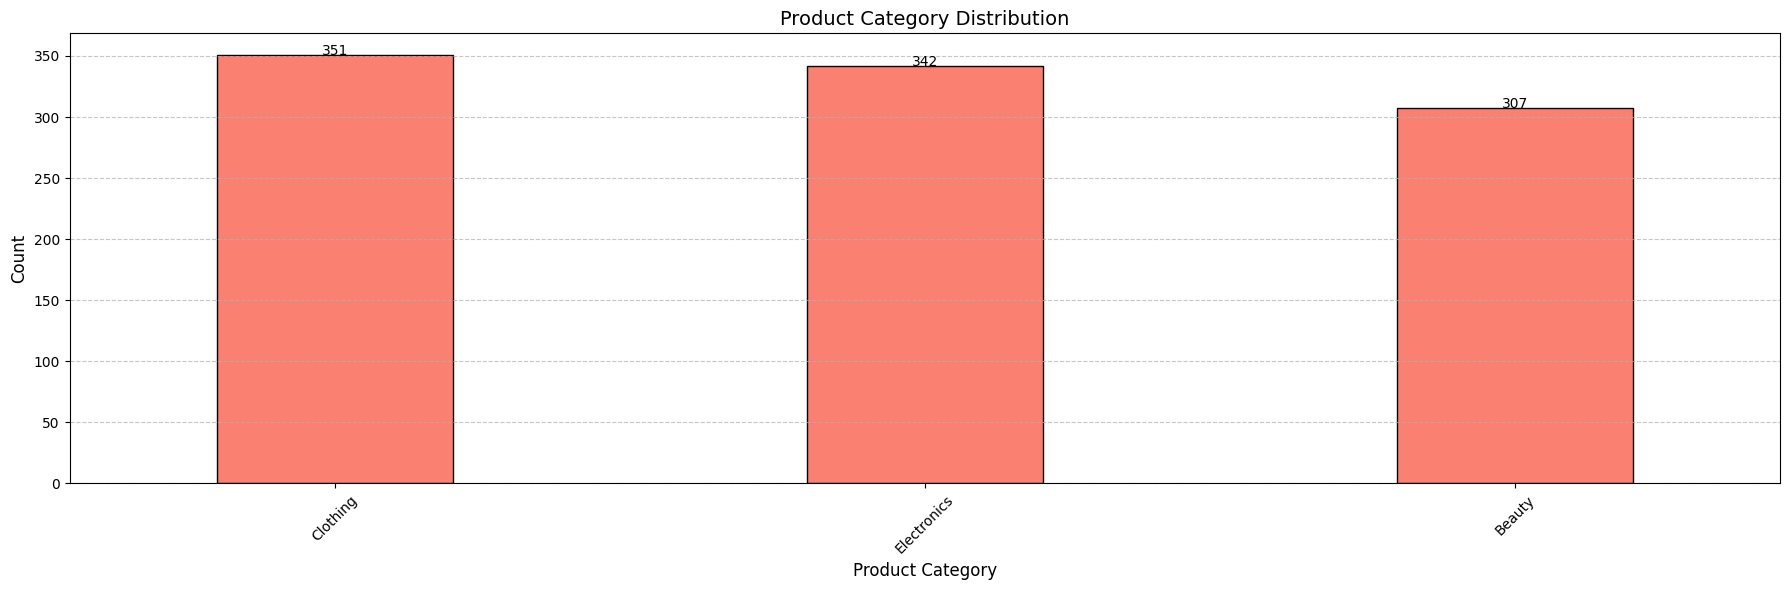

In [ ]:
plt.figure(figsize=(18, 6))  # Increase figure size

# Plot product category distribution
ax = plt.subplot(1, 1, 1)
product_category_distribution.plot(kind='bar', color='salmon', width=0.4, edgecolor='black', ax=ax)  # Adjust bar width and edge color
plt.title('Product Category Distribution', fontsize=14)  # Customize title
plt.xlabel('Product Category', fontsize=12)  # Customize x-axis label
plt.ylabel('Count', fontsize=12)  # Customize y-axis label
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis tick labels for better readability and customize font size
plt.yticks(fontsize=10)  # Customize y-axis tick labels font size
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal gridlines

# Add data labels
for i, count in enumerate(product_category_distribution):
    plt.text(i, count + 0.1, str(count), ha='center', fontsize=10)  # Add data labels above each bar

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


## **Product Category Distribution:** This graph represents the distribution of products across three categories: Clothing, Electronics, and Beauty.
---
###**Clothing:**
The tallest bar corresponds to Clothing, with a count of 351
products.

---


### **Electronics:**
The second-highest bar represents Electronics, with 342 items.


---


### **Beauty:**
The shortest bar corresponds to Beauty, with 307 products.


---


In summary, this dataset indicates that Clothing and Electronics dominate, while Beauty products have a smaller presence. Retailers can use this information to optimize their inventory management and product placement strategies. 🛍️📊

<ipython-input-67-6713a8a3fa3c>:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




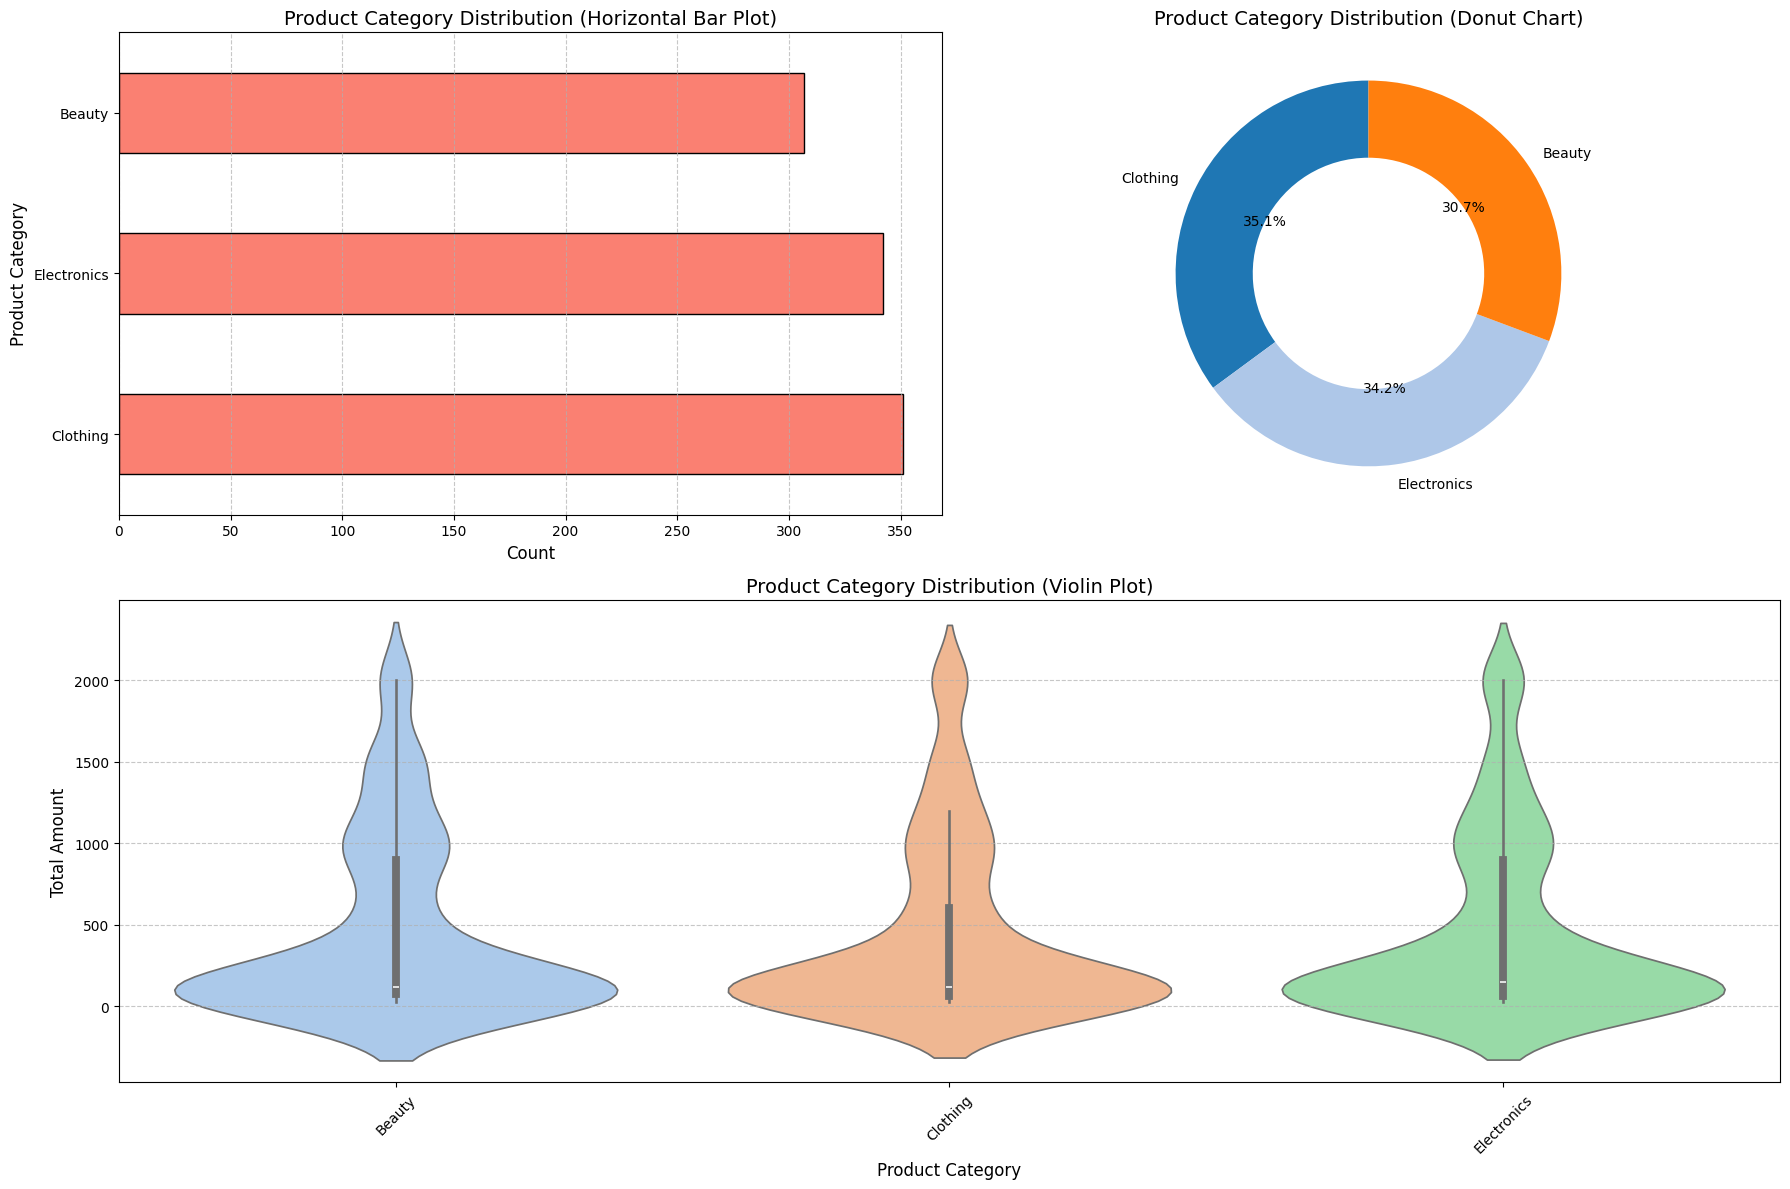

In [ ]:
plt.figure(figsize=(18, 12))

# Horizontal Bar Plot
plt.subplot(2, 2, 1)
product_category_distribution.plot(kind='barh', color='salmon', edgecolor='black')
plt.title('Product Category Distribution (Horizontal Bar Plot)', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Donut Chart
plt.subplot(2, 2, 2)
plt.pie(product_category_distribution, labels=product_category_distribution.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors, wedgeprops=dict(width=0.4))
plt.title('Product Category Distribution (Donut Chart)', fontsize=14)

# Violin Plot (based on total amount)
plt.subplot(2, 1, 2)
sns.violinplot(x='Product Category', y='Total Amount', data=df, palette='pastel')
plt.title('Product Category Distribution (Violin Plot)', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Amount', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### The graph provides insights into the distribution of product categories: **Beauty, Electronics, and Clothing.**


---


### **Horizontal Bar Plot:**
All three categories have **nearly equal product counts.**
For instance, if this data represents a store’s inventory, they likely have similar quantities of Beauty, Electronics, and Clothing items.

---


### **Donut Chart:**
**Clothing**is the **most prevalent category (39%).**
<br>**Electronics** follows **(31%).**
<br>**Beauty** products constitute **30%.**
<br>Imagine a pie divided into these proportions—like sharing a pizza among friends.

---


### **Violin Plots:**
**Beauty:** Concentrated around a specific total amount value.
<br>**Electronics and Clothing:**Wider spread, indicating varying sales or popularity.
<br>**Example:** Beauty products consistently sell at a specific price point, while Electronics and Clothing exhibit more diverse sales amounts.

In [ ]:

# Set the figure size
plt.figure(figsize=(40, 6))

# Create a histogram with Plotly
fig = px.histogram(df, x='Total Amount', nbins=20)

# Update trace to specify bar color
fig.update_traces(marker_color='lightgreen', opacity=0.7)

# Update layout to include hover information
fig.update_layout(
    title='Total Amount Distribution',
    xaxis_title='Total Amount',
    yaxis_title='Frequency',
    hovermode='closest',  # Show hover information for the closest data point
    hoverlabel=dict(bgcolor="white", font_size=12),  # Customize hover label appearance
)

# Show the interactive plot
fig.show()



<Figure size 4000x600 with 0 Axes>

## **Total Amount Distribution**


---


### **Peak at Lower Total Amounts:**
The most frequent total amounts fall below approximately 250.
For instance, there are over 350 occurrences of total amounts less than this threshold.
Imagine these as small transactions or low-cost purchases.
<br>

---


###**Decreasing Frequency with Higher Amounts:**
As the total amount increases, the frequency of occurrence declines.
There are minimal occurrences for total amounts between 500 and 2000.
Consider these as larger transactions or significant expenses.


---


####**Interpretation:**
The graph suggests that the majority of transactions are smaller in value.
It highlights the long tail phenomenon, where a few high-value transactions coexist with many low-value ones.

# **Conclusion:**
###**Monthly Retail Sales Trends:**
Sales exhibit seasonal fluctuations, with peaks and troughs observed across different three-month periods.
Factors influencing sales trends include seasonal patterns, promotional activities, and external economic conditions.

---


### **Gender Distribution:**
The dataset shows a nearly equal distribution between males and females, with 510 females and 490 males represented out of a total of 1000 individuals.

---


###**Age Group Distribution:**
Age groups 51-60 and 41-50 are the most represented, while age groups 0-20 and 71+ have lower representation.
This suggests a diverse customer base, with a concentration in middle-aged demographics.

---


###**Product Category Distribution:**
Clothing and Electronics dominate the product categories, with Beauty products having a smaller presence.
Retailers can optimize inventory and product placement strategies based on these distribution insights.

---

###**Total Amount Distribution:**
Most transactions have lower total amounts, with a peak below approximately 250.
There is a decrease in frequency as the total amount increases, highlighting a long tail distribution pattern.

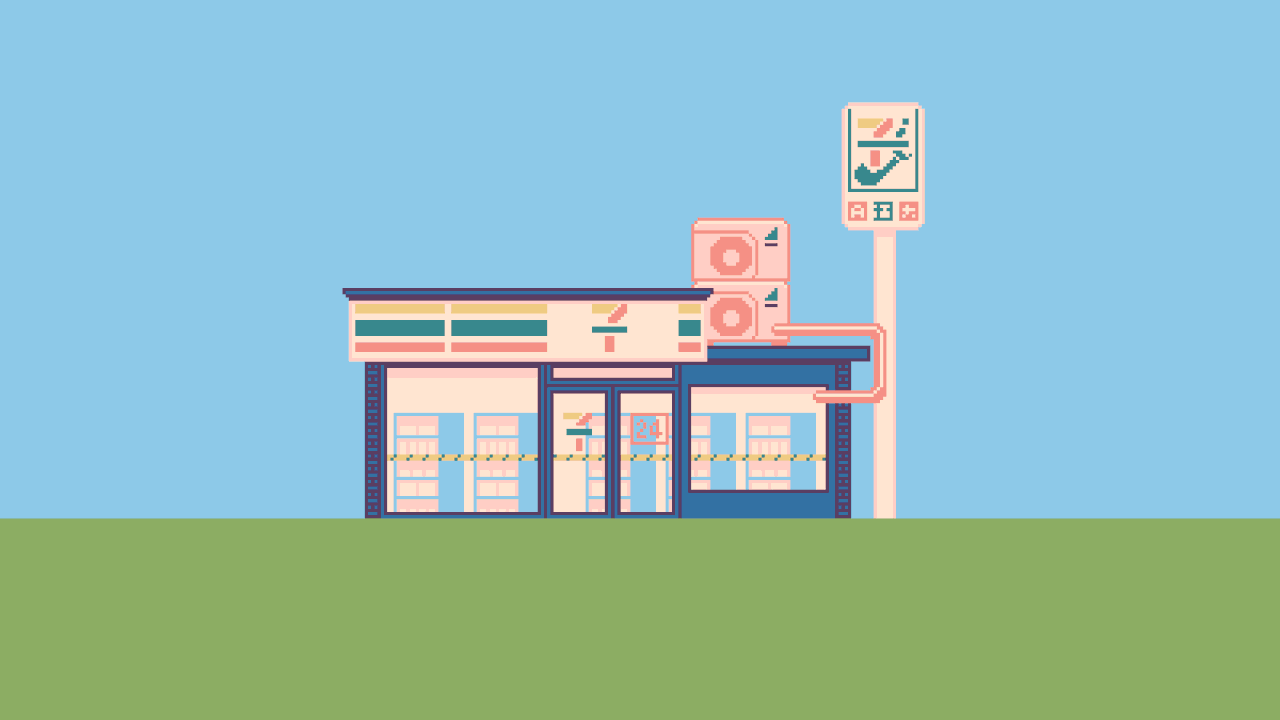